In [1]:
# import libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 

import warnings 
warnings.filterwarnings('ignore')

### Read-in the dataset

In [2]:
# Read the "Heart.csv" dataset and take a quick look
heart = pd.read_csv('Heart.csv')

# Force the response into a binary indicator:
heart['AHD'] = 1*(heart['AHD'] == "Yes")

print(heart.shape)

(303, 15)


In [3]:
# split into train and validation
heart_train, heart_val = train_test_split(heart, train_size = 0.75, random_state = 109)

print(heart_train.shape, heart_val.shape)


(227, 15) (76, 15)


### $k$-NN model fitting

Define and fit a $k$-NN classification model with $k=20$ to predict `AHD` from `Age`.

In [4]:
# select variables for model estimation: be careful of format 
# (aka, single or double square brackets)
x_train = heart_train[["Age"]]
y_train = heart_train["AHD"]

# define the model
knn20 = KNeighborsClassifier(20)

# fit to the data
knn20.fit(x_train , y_train)


KNeighborsClassifier(n_neighbors=20)

### $k$-NN prediction

Perform some simple predictions: both the pure classifications and the probability estimates.

In [5]:

# there are two types of predictions in classification models in sklearn
# model.predict for pure classifications, and model.predict_proba for probabilities

# create the predictions based on the train data
yhat20_class = knn20.predict(x_train)
yhat20_prob = knn20.predict_proba(x_train)

# print out the first 10 predictions for the actual data
print(yhat20_class[1:10])
print(yhat20_prob[1:10])

[0 1 1 1 0 1 1 0 1]
[[0.75 0.25]
 [0.4  0.6 ]
 [0.25 0.75]
 [0.3  0.7 ]
 [0.65 0.35]
 [0.45 0.55]
 [0.35 0.65]
 [0.7  0.3 ]
 [0.35 0.65]]


## Simple logistic regression model fitting

Define and fit a simple logistic model to predict `AHD` from `Age`.

In [6]:
# Create a logistic regression model, with None as the penalty

logit1 = LogisticRegression(penalty=None, max_iter = 1000)

#Fit the model using the training set

logit1.fit(x_train,y_train)

# Get the coefficient estimates

print("Logistic Regression Estimated Betas (B0,B1):",logit1.coef_,logit1.intercept_)


Logistic Regression Estimated Betas (B0,B1): [[0.05933142]] [-3.32616703]


### Interpret the Coefficient Estimates

Recall the logistic regression formula.

$$ \ln\left(  \frac{P(Y=1)}{1-P(Y=1)} \right) = \hat{\beta}_0 + \hat{\beta}_1 X$$

Use this formula and your coefficients from above to answer the following: What is the estimated odds that a 60 year old will have AHD in the ICU?  What is the probability?

In [7]:
# Confirm the probability calculation you made above using logit1logit1.predict_proba()
# predict for one observation where age = 60.  Hint: double brackets is one way to do it

logit1.predict_proba([[60]])

array([[0.44183498, 0.55816502]])

### $k$-NN and logistic accuracy

In [8]:

# Define the equivalent validation variables from `heart_val`

x_val = heart_val[["Age"]]
y_val = heart_val["AHD"]

# Compute the training & validation accuracy using the estimator.score() function

knn20_train_accuracy = knn20.score(x_train, y_train)
knn20_val_accuracy = knn20.score(x_val, y_val)

logit_train_accuracy = logit1.score(x_train, y_train)
logit_val_accuracy = logit1.score(x_val, y_val)

# Print the accuracies below

print("k-NN Train & Validation Accuracy:", knn20_train_accuracy, knn20_val_accuracy)
print("Logisitic Train & Validation Accuracy:", logit_train_accuracy, logit_val_accuracy)




k-NN Train & Validation Accuracy: 0.6563876651982379 0.5921052631578947
Logisitic Train & Validation Accuracy: 0.6387665198237885 0.6052631578947368


### Plot the predictions

Use a linspace to create a dummy x variable for plotting for the two different models.  Here we plot the train and validation data separately, and the 4 different types of predictions (2 for each model: pure classification and probability estimation)

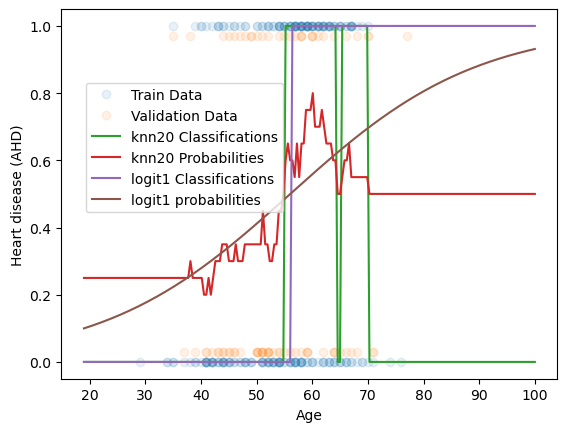

In [11]:

# set-up the dummy x for plotting: we extend it a little bit beyond the range of observed values 
x = np.linspace(np.min(heart[['Age']])-10,90+10,200)


# be careful in pulling off only the correct column of the probability calculations: use `[:,1]`
yhat_class_knn20 = knn20.predict(x)
yhat_prob_knn20 = knn20.predict_proba(x)[:,1]

yhat_class_logit = logit1.predict(x)
yhat_prob_logit = logit1.predict_proba(x)[:,1]

# plot the observed data.  Note: we offset the validation points to make them more clearly differentiated from train
plt.plot(x_train, y_train, 'o' ,alpha=0.1, label='Train Data')
plt.plot(x_val, 0.94*y_val+0.03, 'o' ,alpha=0.1, label='Validation Data')

# plot the predictions
plt.plot(x, yhat_class_knn20, label='knn20 Classifications')
plt.plot(x, yhat_prob_knn20, label='knn20 Probabilities')
plt.plot(x, yhat_class_logit, label='logit1 Classifications')
plt.plot(x, yhat_prob_logit, label="logit1 probabilities")

# put the lower-left part of the legend 5% to the right along the x-axis, and 45% up along the y-axis
plt.legend(loc=(0.05,0.45))

# Don't forget your axis labels!
plt.xlabel("Age")
plt.ylabel("Heart disease (AHD)")

plt.show()
